In [1]:
import re
import aocd
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from math import prod
from scipy.signal import convolve2d

In [2]:
tiles = (101, 103)
data = aocd.get_data(day=14, year=2024)

In [3]:
@dataclass
class Robot:
    position: complex
    velocity: complex
    
    def step(self):
        new_pos = self.position + self.velocity
        self.position = complex(new_pos.real % tiles[0], new_pos.imag % tiles[1])
    
    @staticmethod
    def parse(line):
        num = [int(n) for n in re.findall(r'-?\d+', line)]
        return Robot(position=complex(num[0], num[1]), velocity=complex(num[2], num[3]))


In [4]:
def step(robots):
    for robot in robots:
        robot.step()

def positions(robots):
    return [robot.position for robot in robots]

def quadrants(robots):
    h, v = tiles[0] // 2, tiles[1] // 2
    pos = positions(robots)
    a = sum(p.real < h and p.imag < v for p in pos)
    b = sum(p.real > h and p.imag < v for p in pos)
    c = sum(p.real < h and p.imag > v for p in pos)
    d = sum(p.real > h and p.imag > v for p in pos)
    return a, b, c, d

def image(robots):
    im = np.zeros(tiles)
    for pos in positions(robots):
        x = int(pos.real)
        y = int(pos.imag)
        im[x, y] = 1
    return im.T

In [5]:
robots = [Robot.parse(line) for line in data.splitlines()]
for _ in range(100):
    step(robots)

print("Part 1:",prod(quadrants(robots)))

Part 1: 215476074


Part 2: 6285


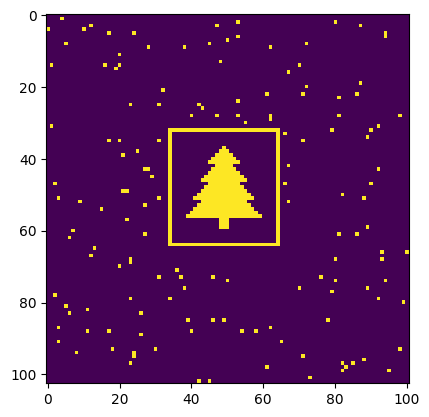

In [6]:
robots = [Robot.parse(line) for line in data.splitlines()]
result = 0, 0, np.array([])

for sec in range(prod(tiles)):
    im = image(robots)
    areas = np.count_nonzero(convolve2d(im, np.ones((2, 2))) == 4)
    if areas > result[0]:
        result = areas, sec, im
    step(robots)

print("Part 2:", result[1])
plt.imshow(result[2])

In [7]:
robots = [Robot.parse(line) for line in data.splitlines()]
result = 0, 0

for sec in range(prod(tiles)):
    num_pos = len(set(positions(robots)))
    if num_pos > result[0]:
        result = num_pos, sec
    step(robots)

print("Part 2:", result[1])

Part 2: 6285
